In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

In [22]:
df = pd.read_csv("/content/COVID clinical trials.csv")
print("✅ Dataset Loaded. Shape:", df.shape)
print("\n📄 Original Columns:\n", df.columns.tolist())

✅ Dataset Loaded. Shape: (5783, 27)

📄 Original Columns:
 ['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Locations', 'Study Documents', 'URL']


In [31]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.loc[:, ~df.columns.duplicated()]

In [33]:
def auto_detect_columns(df):
    rename_map = {}
    for col in df.columns:
        if "phase" in col and "phase" not in rename_map.values():
            rename_map[col] = "phase"
        elif "status" in col and "status" not in rename_map.values():
            rename_map[col] = "status"
        elif "design" in col or "type" in col:
            rename_map[col] = "study_type"
        elif "sponsor" in col:
            rename_map[col] = "sponsor"
        elif "country" in col or "location" in col:
            rename_map[col] = "country"
        elif "enrollment" in col or "participants" in col:
            rename_map[col] = "enrollment"
        elif "gender" in col:
            rename_map[col] = "gender"
        elif "age" in col:
            rename_map[col] = "age"
        elif "title" in col:
            rename_map[col] = "study_title"
        elif "condition" in col:
            rename_map[col] = "condition"
    return df.rename(columns=rename_map)

df = auto_detect_columns(df)
print("\n🧭 After auto-renaming columns:\n", df.columns.tolist())

# Handle missing values safely
df = df.fillna({"phase": "Unknown", "status": "Unknown", "study_type": "Unknown"})


🧭 After auto-renaming columns:
 ['rank', 'nct_number', 'study_title', 'acronym', 'status', 'study_results', 'condition', 'interventions', 'outcome_measures', 'sponsor', 'gender', 'age', 'phase', 'enrollment', 'funded_bys', 'study_type', 'other_ids', 'start_date', 'primary_completion_date', 'completion_date', 'first_posted', 'results_first_posted', 'last_update_posted', 'country', 'study_documents', 'url']


In [35]:
print("\n🩺 Dataset Summary:")
print(df.describe(include='all').T.head(10))


🩺 Dataset Summary:
                   count unique  \
rank              5783.0    NaN   
nct_number          5783   5783   
study_title         5783   5775   
acronym             2480   2338   
status              5783     12   
study_results       5783      2   
condition           5783   3067   
interventions       4897   4337   
outcome_measures    5748   5687   
sponsor             5783   3631   

                                                                top  freq  \
rank                                                            NaN   NaN   
nct_number                                              NCT04680000     1   
study_title       Acalabrutinib Study With Best Supportive Care ...     2   
acronym                                                    COVID-19    47   
status                                                   Recruiting  2805   
study_results                                  No Results Available  5747   
condition                                              

In [37]:
for field in ["phase", "status", "study_type"]:
    if field in df.columns:
        print(f"\nUnique {field}s:", df[field].unique()[:10])


Unique phases: ['Not Applicable' 'Phase 1|Phase 2' 'Unknown' 'Early Phase 1'
 'Phase 2|Phase 3' 'Phase 1' 'Phase 4' 'Phase 2' 'Phase 3']

Unique statuss: ['Active, not recruiting' 'Not yet recruiting' 'Recruiting'
 'Enrolling by invitation' 'Suspended' 'Completed' 'Withdrawn'
 'Terminated' 'No longer available' 'Available']

Unique study_types: ['Interventional' 'Observational' 'Expanded Access:Treatment IND/Protocol'
 'Expanded Access:Individual Patients|Intermediate-size Population'
 'Expanded Access:Intermediate-size Population'
 'Expanded Access:Intermediate-size Population|Treatment IND/Protocol'
 'Expanded Access'
 'Expanded Access:Individual Patients|Treatment IND/Protocol'
 'Expanded Access:Individual Patients']


/tmp/ipython-input-2784392887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette="coolwarm")


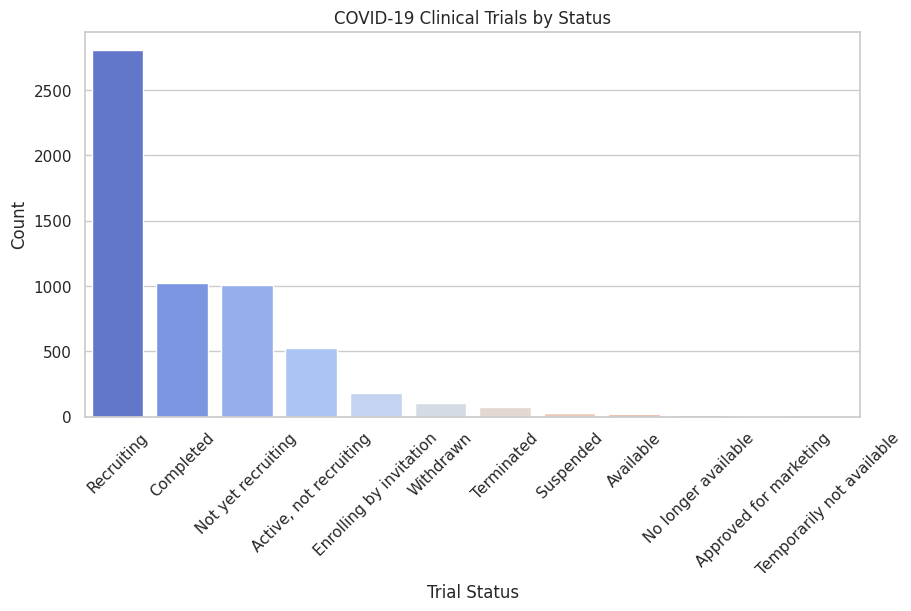

In [39]:
if "status" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette="coolwarm")
    plt.title("COVID-19 Clinical Trials by Status")
    plt.xlabel("Trial Status")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-1293225476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='phase', order=df['phase'].value_counts().index, palette="viridis")


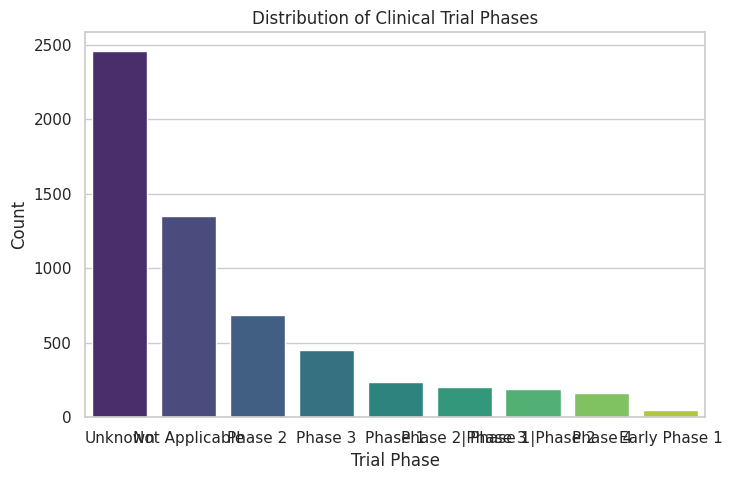

In [41]:
if "phase" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='phase', order=df['phase'].value_counts().index, palette="viridis")
    plt.title("Distribution of Clinical Trial Phases")
    plt.xlabel("Trial Phase")
    plt.ylabel("Count")
    plt.show()

/tmp/ipython-input-191696923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='study_type', order=df['study_type'].value_counts().index, palette="pastel")


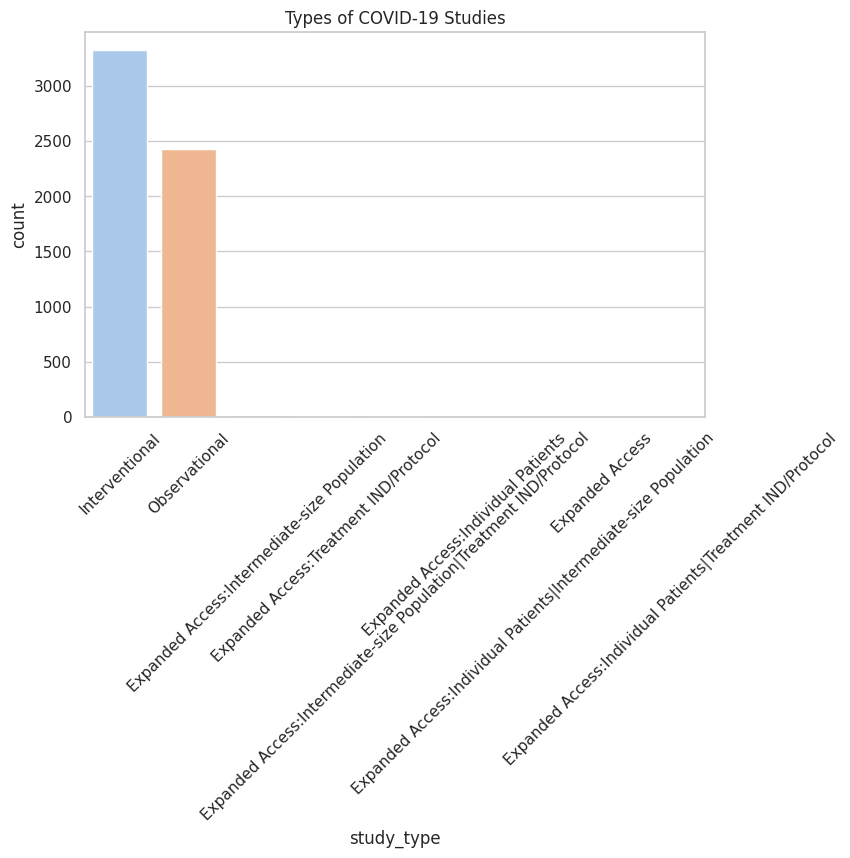

In [43]:
if "study_type" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='study_type', order=df['study_type'].value_counts().index, palette="pastel")
    plt.title("Types of COVID-19 Studies")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-297248189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sponsors.values, y=top_sponsors.index, palette="mako")


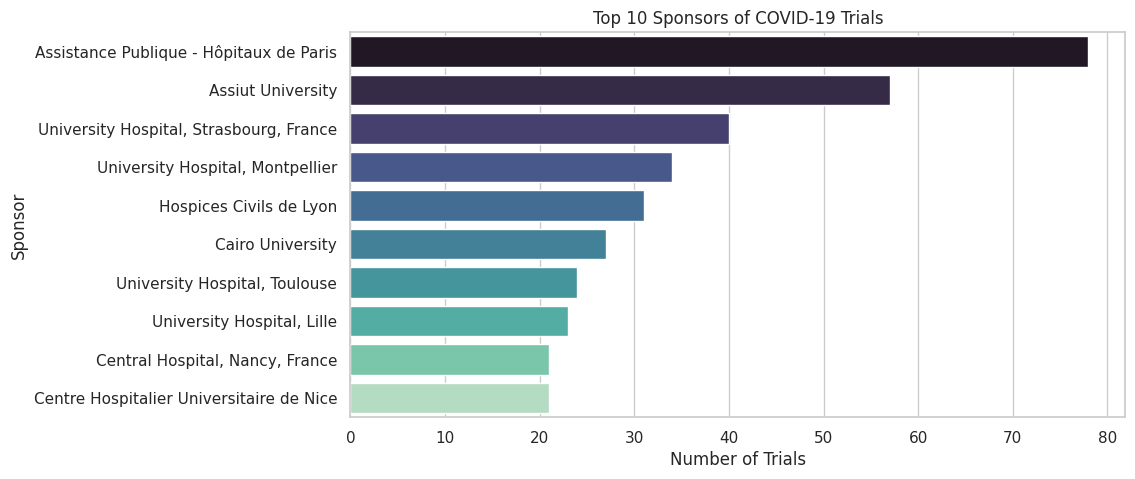

In [45]:
if "sponsor" in df.columns:
    top_sponsors = df['sponsor'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_sponsors.values, y=top_sponsors.index, palette="mako")
    plt.title("Top 10 Sponsors of COVID-19 Trials")
    plt.xlabel("Number of Trials")
    plt.ylabel("Sponsor")
    plt.show()

/tmp/ipython-input-1391862285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")


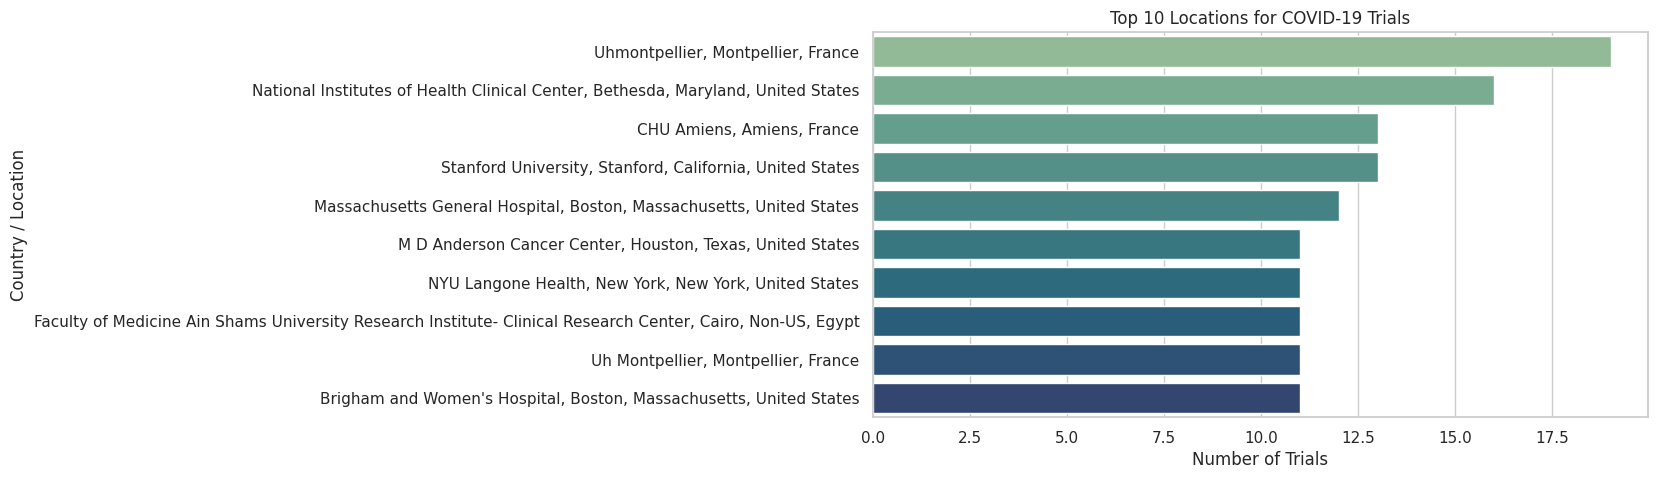

In [47]:
if "country" in df.columns:
    top_countries = df['country'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")
    plt.title("Top 10 Locations for COVID-19 Trials")
    plt.xlabel("Number of Trials")
    plt.ylabel("Country / Location")
    plt.show()

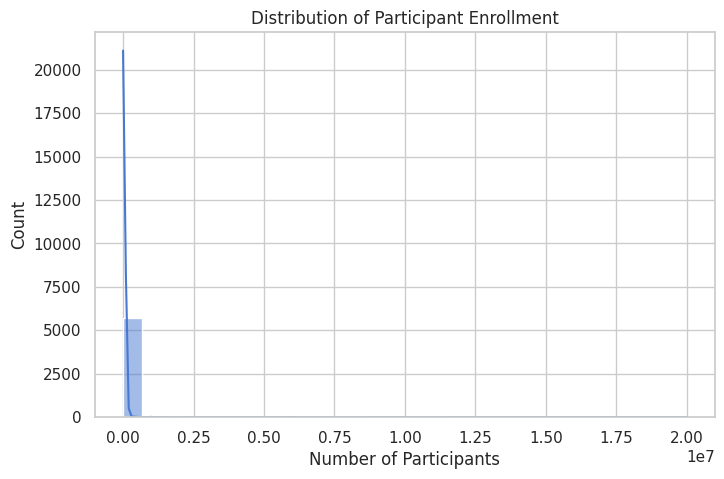

In [49]:
if "enrollment" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["enrollment"], bins=30, kde=True)
    plt.title("Distribution of Participant Enrollment")
    plt.xlabel("Number of Participants")
    plt.ylabel("Count")
    plt.show()

/tmp/ipython-input-2948902071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


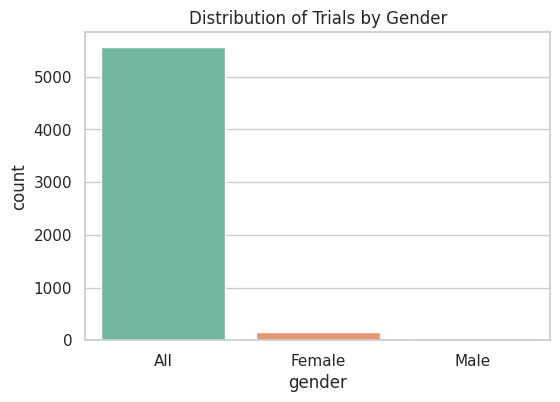

/tmp/ipython-input-2948902071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


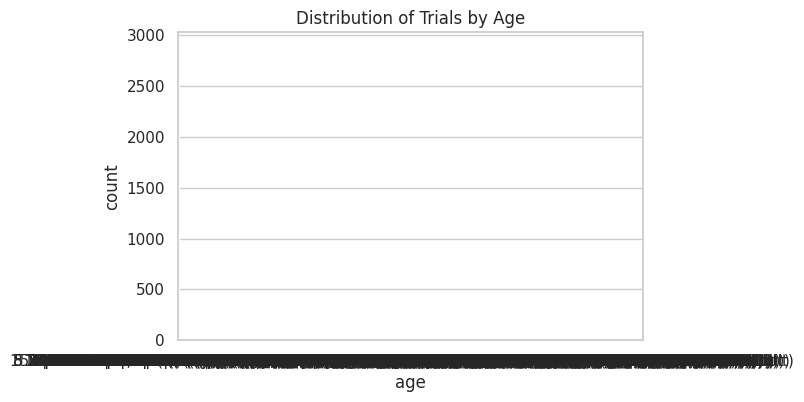

In [51]:
for col in ["gender", "age"]:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, palette="Set2")
        plt.title(f"Distribution of Trials by {col.capitalize()}")
        plt.show()

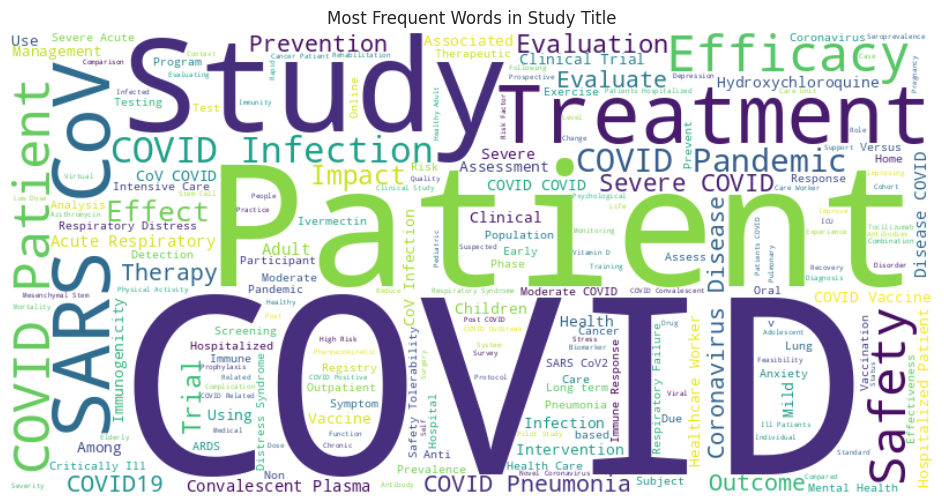

In [53]:
text_col = None
for col in ["study_title", "condition"]:
    if col in df.columns:
        text_col = col
        break

if text_col:
    text = " ".join(str(i) for i in df[text_col].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Frequent Words in {text_col.replace('_', ' ').title()}")
    plt.show()

In [54]:
print("\n🔍 Key Insights:")
print("- The dataset captures diverse COVID-19 trials across multiple regions and study designs.")
if "phase" in df.columns:
    print("- Trials are spread across multiple phases, reflecting both early and late-stage research.")
if "status" in df.columns:
    print("- Many trials are completed or recruiting — showing sustained scientific effort globally.")
if "sponsor" in df.columns:
    print("- A few top sponsors dominate trial counts — likely major pharma or research institutes.")
if "country" in df.columns:
    print("- The top countries highlight regional hubs of COVID-19 research activity.")
if "enrollment" in df.columns:
    print("- Enrollment data suggests most trials have modest participant sizes, but a few are very large.")


🔍 Key Insights:
- The dataset captures diverse COVID-19 trials across multiple regions and study designs.
- Trials are spread across multiple phases, reflecting both early and late-stage research.
- Many trials are completed or recruiting — showing sustained scientific effort globally.
- A few top sponsors dominate trial counts — likely major pharma or research institutes.
- The top countries highlight regional hubs of COVID-19 research activity.
- Enrollment data suggests most trials have modest participant sizes, but a few are very large.
